# Python Seaborn CheatSheet
<img src="../sample_files/logos/seaborn.svg" width="400" />

The Python visualization library Seaborn is based on
matplotlib and provides a high-level interface for drawing
attractive statistical graphics.

Make use of the following aliases to import the libraries:

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

The basic steps to creating plots with Seaborn are:
1. Prepare some data
2. Control figure aesthetics
3. Plot with Seaborn
4. Further customize your plot
5. Display the plot

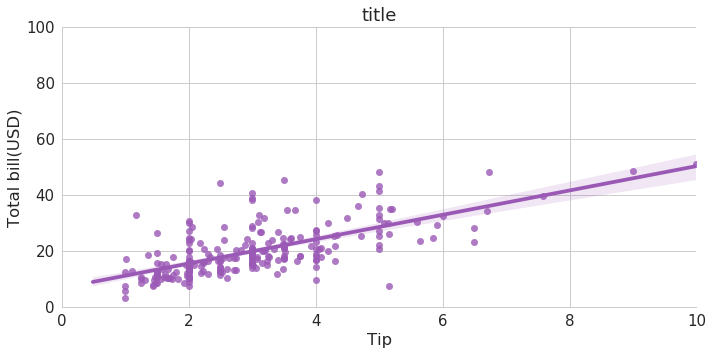

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
#-- Step 1
tips = sns.load_dataset("tips")
#-- Step 2
sns.set_style("whitegrid")
#-- Step 3
g = sns.lmplot(x="tip",
               y="total_bill",
               data=tips,
               aspect=2)
g = (g.set_axis_labels("Tip","Total bill(USD)").set(xlim=(0,10),ylim=(0,100)))
#-- Step 4
plt.title("title")
#-- Step 5
plt.show(g)

## 1. Data

In [37]:
import pandas as pd
import numpy as np
uniform_data = np.random.rand(10, 12)
data = pd.DataFrame({'x':np.arange(1,101),
                     'y':np.random.normal(0,4,100)})

In [38]:
# Seaborn also offers built-in data sets:
titanic = sns.load_dataset("titanic")
iris = sns.load_dataset("iris")

## 2. Figure Aesthetics

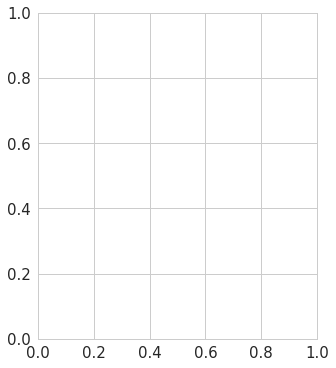

In [39]:
f, ax = plt.subplots(figsize=(5,6)) # Create a figure and one subplot

### Seaborn styles

In [40]:
sns.set()                  # (Re)set the seaborn default
sns.set_style("whitegrid") # Set the matplotlib parameters
sns.set_style("ticks",     # Set the matplotlib parameters
             {"xtick.major.size":8,
             "ytick.major.size":8})
sns.axes_style("whitegrid") # Return a dict of params or use with 
                            # with to temporarily set the style

{'figure.facecolor': 'white',
 'text.color': '.15',
 'axes.labelcolor': '.15',
 'legend.frameon': False,
 'legend.numpoints': 1,
 'legend.scatterpoints': 1,
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'axes.axisbelow': True,
 'image.cmap': 'rocket',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'grid.linestyle': '-',
 'lines.solid_capstyle': 'round',
 'axes.grid': True,
 'axes.facecolor': 'white',
 'axes.edgecolor': '.8',
 'axes.linewidth': 1,
 'grid.color': '.8',
 'xtick.major.size': 0,
 'ytick.major.size': 0,
 'xtick.minor.size': 0,
 'ytick.minor.size': 0}

### Context Functions

In [41]:
sns.set_context("talk")                     # Set context to "talk"
sns.set_context("notebook",                 # Set context to "notebook",
                font_scale=1.5,             # Scale font elements and
                rc={"lines.linewidth":2.5}) # override param mapping

### Color Palette

In [42]:
sns.set_palette("husl",3) # Define the color palette
sns.color_palette("husl") # Use with with to temporarily set palette
flatui = ["#9b59b6","#3498db","#95a5a6","#e74c3c","#34495e","#2ecc71"]
sns.set_palette(flatui)   # Set your own color palette

## 3. Plotting with Seaborn
### Axis Grids

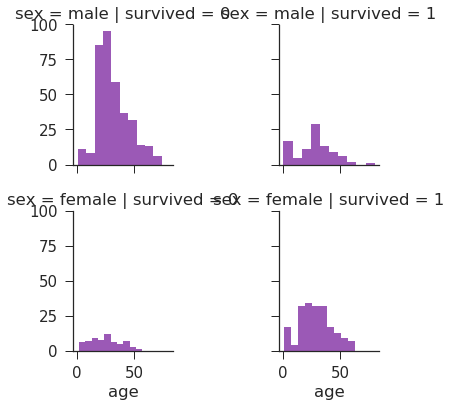

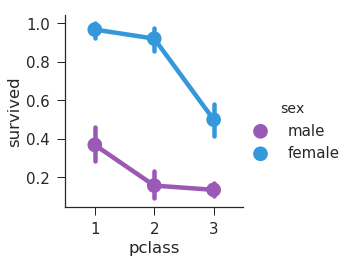

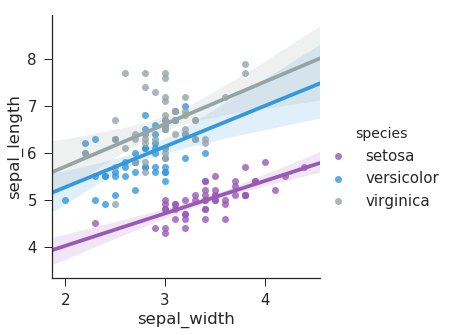

In [43]:
p = sns.FacetGrid(titanic,        # Subplot grid for plotting conditional
                  col="survived", # relationships
                  row="sex")
p = p.map(plt.hist,"age")
p = sns.factorplot(x="pclass",   # Draw a categorical plot onto a
               y="survived", # Facetgrid
               hue="sex",
               data=titanic)
p = sns.lmplot(x="sepal_width",  # Plot data and regression model fits
           y="sepal_length", # across a FacetGrid
           hue="species",
           data=iris)

### Categorical Plots

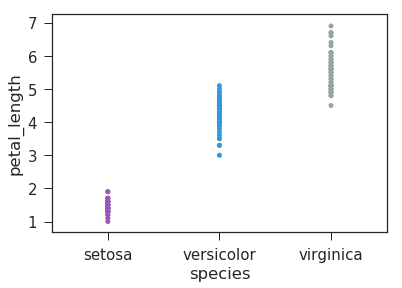

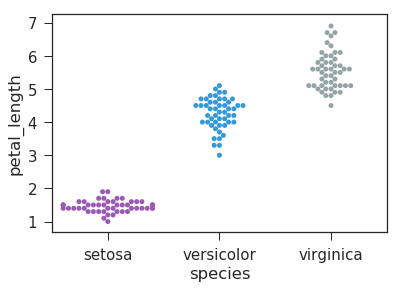

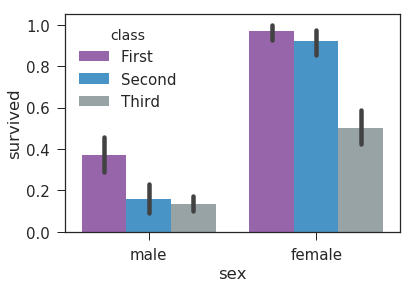

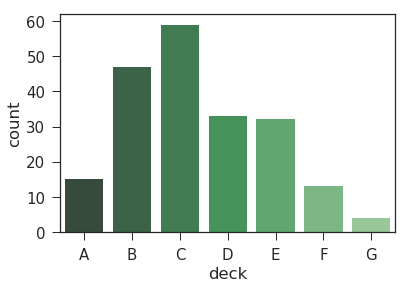

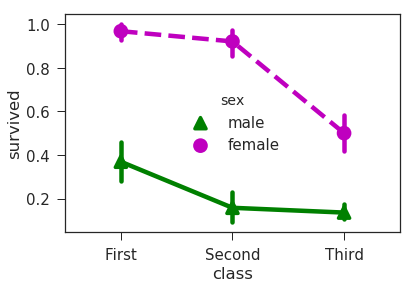

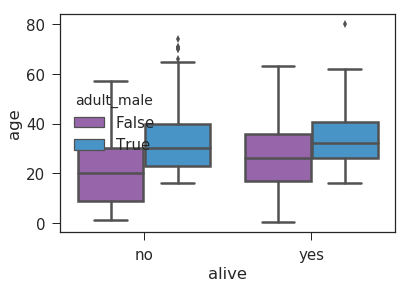

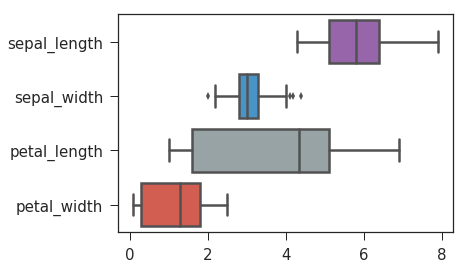

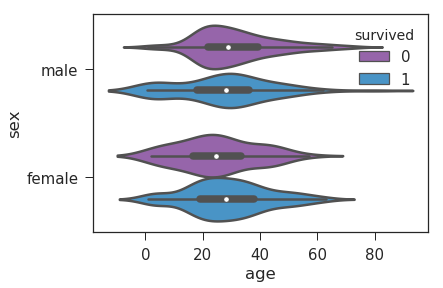

In [44]:
# Scatterplot
p = sns.stripplot(x="species", # Scatterplot with one categorical variable
              y="petal_length", 
              data=iris)
plt.show(p)
p = sns.swarmplot(x="species", # Categorical scatterplot with non-overlapping points
              y="petal_length", 
              data=iris)
plt.show(p)

# Bar Chart
p = sns.barplot(x="sex",       # Show point estimates and confidence intervals with scatterplot glyphs
                y="survived", 
                hue="class", 
                data=titanic)
plt.show(p)

# Count Plot
p = sns.countplot(x="deck",    # Show count of observations
                  data=titanic,
                  palette="Greens_d")
plt.show(p)

# Point Plot
p = sns.pointplot(x="class",   # Show point estimates and confidence intervals as rectangular bars
                  y="survived",
                  hue="sex",
                  data=titanic,
                  palette={"male":"g",
                  "female":"m"},
                  markers=["^","o"],
                  linestyles=["-","--"])
plt.show(p)

# Boxplot
p = sns.boxplot(x="alive",     # Boxplot
                y="age",
                hue="adult_male",
                data=titanic)
plt.show(p)

p = sns.boxplot(data=iris,orient="h") # Boxplot with wide-form data
plt.show(p)

# Violinplot
p = sns.violinplot(x="age",    # Violin plot
                   y="sex",
                   hue="survived",
                   data=titanic)
plt.show(p)


### Regression Plots

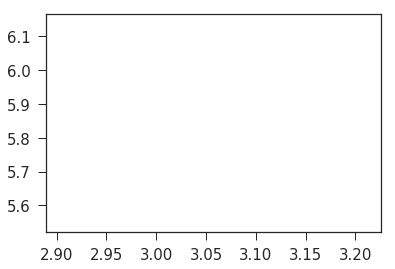

In [45]:
p = sns.regplot(x="sepal_width", # Plot data and a linear regression model fit
                y="sepal_length", 
                data=iris,
                ax=ax)
plt.show(p)

### Distribution Plots

/home/zas/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


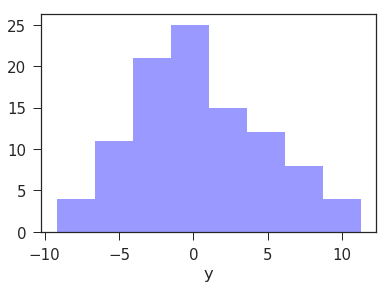

In [46]:
# Plot univariate distribution
p = sns.distplot(data.y, kde=False, color="b")
plt.show(p)

### Matrix Plots

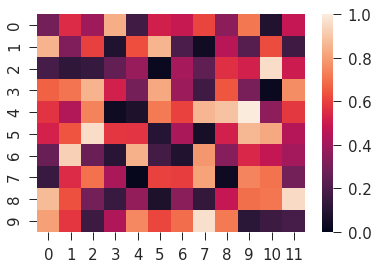

In [47]:
p = sns.heatmap(uniform_data,vmin=0,vmax=1) # Heatmap
plt.show(p)

## 4. Further Customization
### Axisgrid Objects

In [52]:
g.despine(left=True)           # Remove left spine
g.set_ylabels("Survived")      # Set the labels of the y-axis
g.set_xticklabels(rotation=45) # Set the tick labels for x
g.set_axis_labels("Survived",  # Set the axis labels
                  "Sex")
g.set(xlim=(0,5),              # Set the limit and ticks of the
      ylim=(0,5),              # x-and y-axis
      xticks=[0,2.5,5],
      yticks=[0,2.5,5])

### Plot

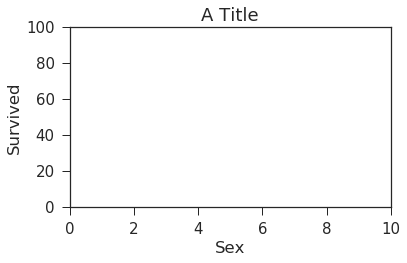

In [53]:
plt.title("A Title")      # Add plot title
plt.ylabel("Survived")    # Adjust the label of the y-axis
plt.xlabel("Sex")         # Adjust the label of the x-axis
plt.ylim(0,100)           # Adjust the limits of the y-axis
plt.xlim(0,10)            # Adjust the limits of the x-axis
plt.setp(ax,yticks=[0,5]) # Adjust a plot property
plt.tight_layout()        # Adjust subplot params

## 5. Show or Save Plot

In [55]:
plt.show()             # Show the plot
plt.savefig("../sample_files/images/seaborn_1.png") # Save the plot as a figure
plt.savefig("../sample_files/images/seaborn_2.png",transparent=True) # Save transparent figure

<Figure size 432x288 with 0 Axes>

## Show and Clear

In [ ]:
plt.cla()   # Clear an axis
plt.clf()   # Clear an entire figure
plt.close() # Close a window